# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [1]:
import torch
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [2]:
a = torch.FloatTensor(3, 4)
b = torch.FloatTensor(12, )
c = b.view(2, 2, 3)

In [3]:
a[:, 0]

tensor([2.8092e-34,        nan, 4.3066e+21])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [4]:
a = torch.FloatTensor(5, 2)
b = torch.FloatTensor(1, 10)
c = b.view(5, 2)

In [5]:
# для проверки функций лучше заполнить тензоры чем-то более менее вменяемым, например, нулями и единицами
a.zero_()
c.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [6]:
a.add(c)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [7]:
a.sub(c)

tensor([[-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.]])

In [8]:
a.mul(c)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [9]:
a.div(c)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [23]:
images = torch.zeros(100, 200, 200, 3, dtype=torch.int)

for i in range(images.shape[0]):
  images[i, i*2:i*2+2, :] =255

In [24]:
from random import randrange

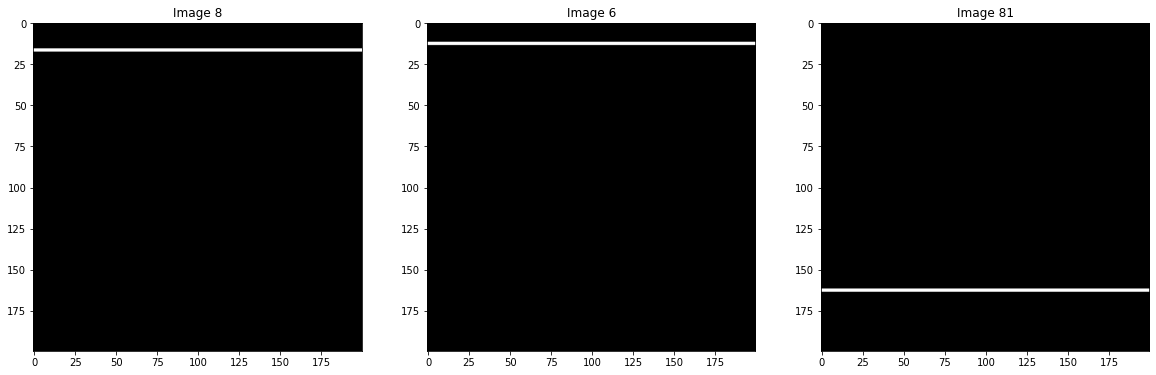

In [26]:
RANDOM_IMAGES = 3
f, axarr = plt.subplots(1, RANDOM_IMAGES, figsize=(20, 20)) 

for image in range(RANDOM_IMAGES):
  random_image = randrange(len(images))
  axarr[image].title.set_text(f"Image {random_image}")
  axarr[image].imshow(images[random_image].int())

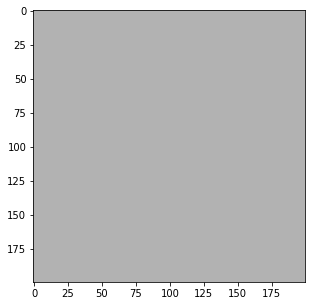

In [27]:
plt.figure(figsize=(5, 5))

plt.imshow((torch.mean(images.float(), 0) * 70).int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [28]:
from torch.autograd import Variable

In [29]:
a = torch.FloatTensor(2, 3, 4).uniform_()
a = a.cuda()

b = torch.FloatTensor(1, 8, 3).uniform_()
b = b.cuda()

c = b.view(a.shape).cpu()
a = a.cpu()

c = Variable(c, requires_grad=True)
a = Variable(a, requires_grad=True)

L = torch.mean((c - a)**2)

L.backward()

c.grad

tensor([[[ 0.0325,  0.0156,  0.0249,  0.0080],
         [ 0.0279,  0.0237, -0.0087,  0.0507],
         [ 0.0032, -0.0259, -0.0116,  0.0029]],

        [[ 0.0152, -0.0391,  0.0116,  0.0230],
         [-0.0254, -0.0339, -0.0354, -0.0332],
         [-0.0440,  0.0218,  0.0327,  0.0490]]])